**__This notebook is based on walmart sales dataset. Walmart is one of the biggest retailers in the world, so what i am trying to do is to analyse which facet of their business influences their sales revenue__**

In [52]:
#importing necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [62]:
#loading the datset

df = pd.read_csv("Walmart_sales.csv")
print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

In [63]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Convert the 'date_column' to datetime if it's not already
df.set_index('Date', inplace=True) # set it as an index

In [35]:
df.isnull().sum() #checking if theres any nulls

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [37]:
df.head() #first 5 rows of the dataset

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [38]:
df.tail() #last 5 rows of the dataset

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667
2012-10-19,45,718125.53,0,56.47,3.969,192.330854,8.667
2012-10-26,45,760281.43,0,58.85,3.882,192.308899,8.667


**EXPLORATORY ANALYSIS**

In [39]:
df.describe() #statistical describtion of the data


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

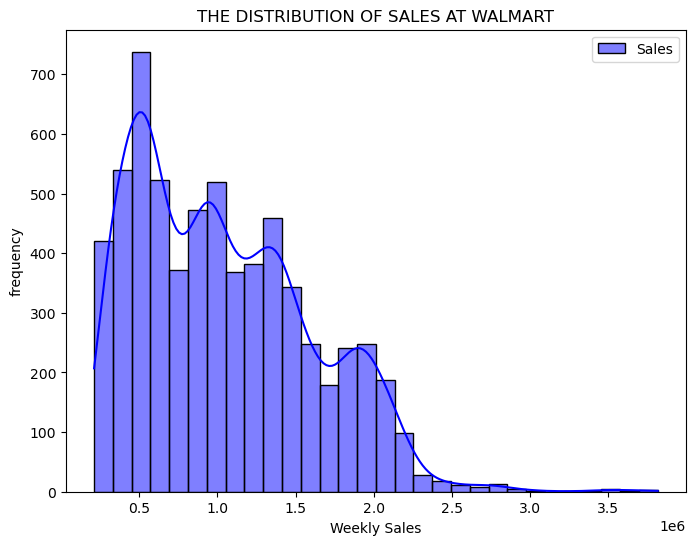

In [40]:
# hist of weekly sales

plt.figure(figsize = (8, 6))
sns.histplot(df["Weekly_Sales"], bins = 30, kde = True, color = "blue", label = "Sales")
plt.title("THE DISTRIBUTION OF SALES AT WALMART")
plt.xlabel("Weekly Sales")
plt.ylabel("frequency")
plt.legend()
plt.grid(False)
plt.show

In summary, the sales seem to be decreasing, it's important to conduct a thorough analysis to understand the underlying causes and develop targeted strategies to address the issue. By identifying and addressing contributing factors, businesses can work towards reversing the sales decline and driving future growth.








**LETS SEE THE RELATIONSHIP BETWEEN THE CPI AND THE DATE.**

CPI is a major influence in consumer spending. It measures the average change in prices paid by consumers for a basket of goods and services over time. It's a crucial economic indicator used to gauge inflation or deflation trends. and therefore CPI could be another reason why the sales are dropping.

C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'CONSUMER PRICE INDEX OVER TIME')

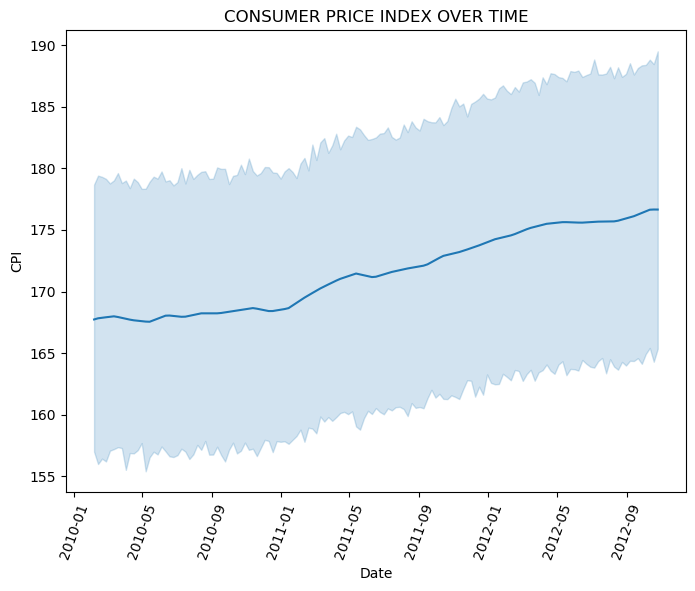

In [41]:

plt.figure(figsize=(8,6))
sns.lineplot(df, x=df.index, y='CPI')
plt.xticks(rotation=70)
plt.title('CONSUMER PRICE INDEX OVER TIME')

With the above plot we can see that over time the CPI is increasing. This is somewhat an evident that one of the reason the sales are decreasing is the effects of the CPI.

**CORRELATION BETWEEN THE FUEL PRICE AND CPI**

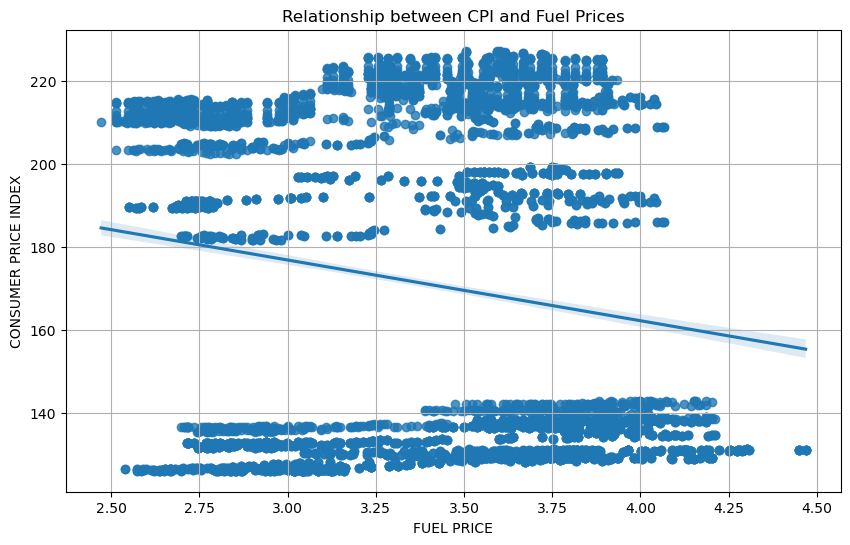

In [42]:
#the relationship between fuel price and cpi
plt.figure(figsize=(10, 6))
sns.regplot(x='Fuel_Price', y='CPI', data=df)
plt.title('Relationship between CPI and Fuel Prices')
plt.xlabel('FUEL PRICE')
plt.ylabel('CONSUMER PRICE INDEX')
plt.grid(True)
plt.show()

With the above plot, I plotted a scatter plot with a linear regression model fit in order to see their relationship. we can see that with the increase in fuel price there is a decrease in consumer price index which also affects the buying power, therefore we can say that there is a negative effect when fuel prices increases.

*PLOTING HEATMAP.*

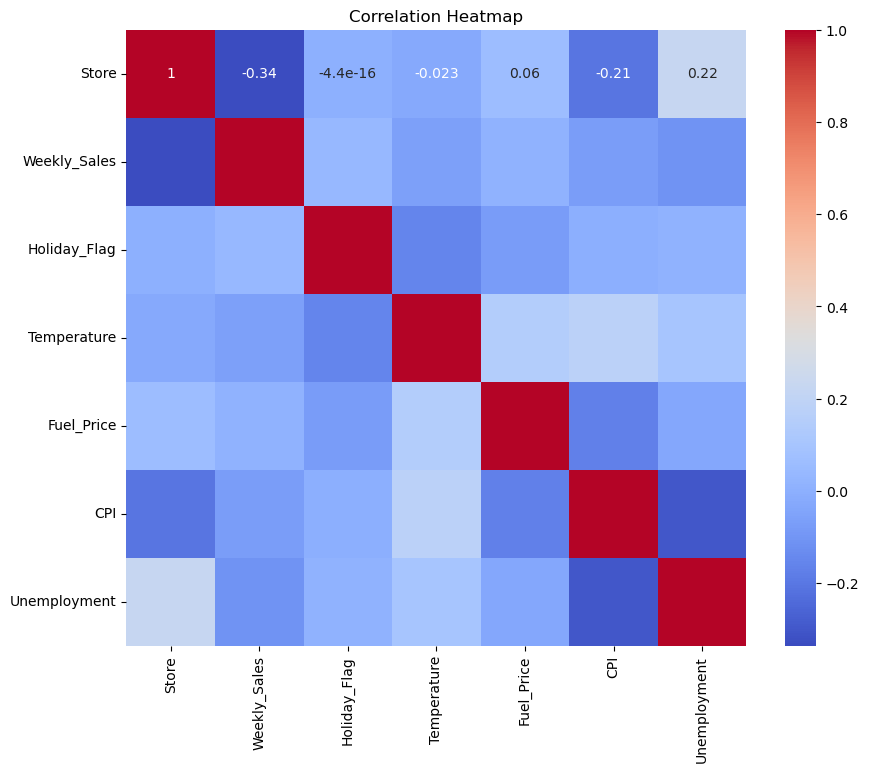

In [43]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

With the above visual, we are able to see pattern recognision and decision support.

**MODEL DEVELOPMENT**

In [44]:
print("..................................................................................")

..................................................................................


**Model to predict a continuous target variable**

In [45]:
#droping columns which i do not necessarily need
df2 = df.drop(["Holiday_Flag", "Temperature", "Unemployment"], axis=1)
print(df2)

            Store  Weekly_Sales  Fuel_Price         CPI
Date                                                   
2010-02-05      1    1643690.90       2.572  211.096358
2010-02-12      1    1641957.44       2.548  211.242170
2010-02-19      1    1611968.17       2.514  211.289143
2010-02-26      1    1409727.59       2.561  211.319643
2010-03-05      1    1554806.68       2.625  211.350143
...           ...           ...         ...         ...
2012-09-28     45     713173.95       3.997  192.013558
2012-10-05     45     733455.07       3.985  192.170412
2012-10-12     45     734464.36       4.000  192.327265
2012-10-19     45     718125.53       3.969  192.330854
2012-10-26     45     760281.43       3.882  192.308899

[6435 rows x 4 columns]


In [48]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Splitting data into features (X) and target variable (y)
X = df2.drop("Weekly_Sales", axis=1)
y = df2["Weekly_Sales"]




# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [49]:
# Initialize and train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)


GradientBoostingRegressor()

In [50]:
# Make predictions
y_pred = gb_regressor.predict(X_test)


In [54]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 34899541393.40075


**VISUALISING THE MODEL PERFORMANCE**

*Scatter Plot of Actual vs. Predicted Values:
Plot the actual target values against the predicted values. Each point on the plot represents a data instance, with the x-coordinate being the actual target value and the y-coordinate being the predicted value.
Ideally, the points should fall close to a diagonal line, indicating a good fit between the actual and predicted values.*

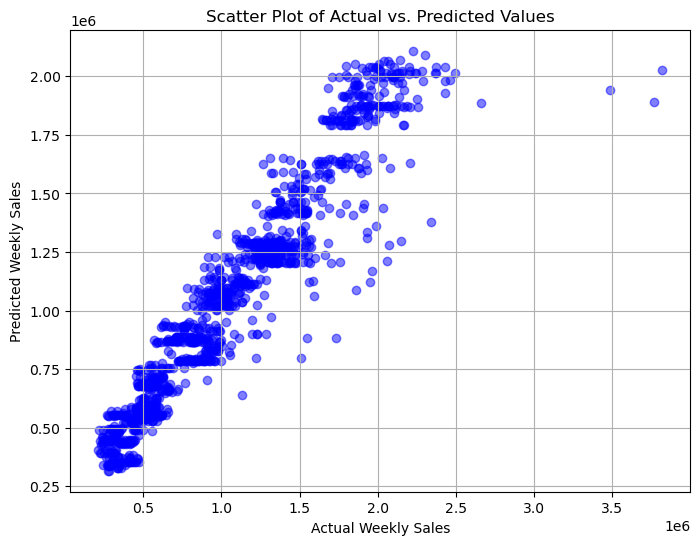

In [67]:
# Create scatter plot
plt.figure(figsize=(8, 6)) #size of the plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')

plt.grid(True)
plt.show()




**A positive linear relationship between the actual and predicted values indicates that the model is capturing the underlying patterns in the data effectively. This suggests that the model's predictions tend to increase as the actual values increase, which is desirable for regression tasks.**
**When the predicted values closely follow the actual values, stakeholders can have more confidence in the model's outputs, leading to better decision-making.**
*

*Residual Plot:
Plot the residuals (the differences between the actual and predicted values) against the predicted values or against the feature values.
A well-fitted model should have residuals randomly scattered around zero, with no discernible pattern.*

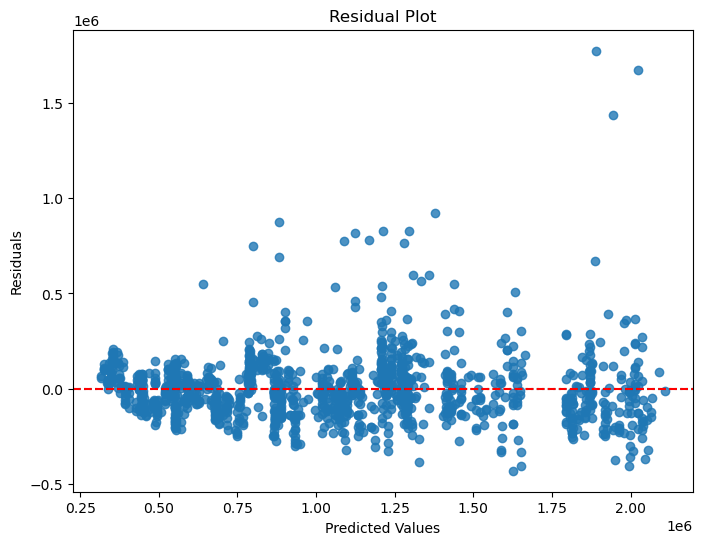

In [56]:
# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

**residuals are randomly scattered around the horizontal axis and have no clear pattern, it suggests that the model's assumptions are likely met, and the model is capturing the underlying patterns in the data effectively. it is providing valuable insights for the business. It indicates that the model's predictions are accurate, reliable, and aligned with the underlying patterns in the data, which is crucial for driving successful business outcomes.**